### Import libraries

In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### Read dataset
- Bộ dữ liệu này mô tả mối quan hệ giữa kinh nghiệm làm việc (tháng) và mức lương hàng tháng (nghìn đô la) của nhân viên trong các ngành nghề. 
Nó được thiết kế để giúp người học và các nhà khoa học dữ liệu thực hành hồi quy tuyến tính để dự đoán lương dựa trên kinh nghiệm.
https://www.kaggle.com/datasets/saquib7hussain/experience-salary-dataset
- Salary Dataset for Simple linear regression
https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression

In [216]:
df_large_salary = pd.read_csv("./Experience-Salary.csv")
df_simple_salary = pd.read_csv("./Salary_dataset.csv")
print(df_large_salary.head())
print(df_simple_salary.head())

   exp(in months)  salary(in thousands)
0       18.290293             16.521825
1       17.023407             11.666234
2       26.343613             23.167255
3       19.105834             20.877145
4       27.742516             23.166236
   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0


1. exp(in months) -> kinh nghiệm được tính theo tháng
2. salary(in thousands) -> lương được tính theo ngàn USD
3. YearsExperience -> inh nghiệm được tính theo năm
4. Salary -> lương được tính theo ngàn USD

In [217]:
# Xử lý cho dataset lớn
X_large = df_large_salary['exp(in months)']  # Lấy cột 'exp(in months)'
X_large = X_large.values.reshape(-1, 1)  # Lấy x và chuyển thành dạng 2D (một cột) vì khi làm việc với sklearn thì x là phải là cột
y_large = df_large_salary['salary(in thousands)']  # Lấy cột 'salary(in thousands)'

# Xử lý cho dataset đơn giản
X_simple = df_simple_salary['YearsExperience']  # Lấy cột 'YearsExperience'
X_simple = X_simple.values.reshape(-1, 1)  # Lấy x và chuyển thành dạng 2D (một cột) vì khi làm việc với sklearn thì x là phải là cột
y_simple = df_simple_salary['Salary']  # Lấy cột 'Salary'

### Split the data into training and test sets


#### https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [218]:
x_train_large, x_test_large, y_train_large, y_test_large = train_test_split(X_large, y_large, test_size=0.2, random_state=18, shuffle=True)
x_train_simple, x_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y_simple, test_size=0.2, random_state=18, shuffle=True)

# train_test_split --> chia dữ liệu thành các bộ huấn luyện và kiểm tra
# test_size=0.2 -> Dữ liệu sẽ được chia theo tỷ lệ 80% cho huấn luyện và 20% cho kiểm tra.
# shuffle=True -> dữ liệu sẽ được xáo trộn trước khi chia thành bộ huấn luyện và kiểm tra để đảm bảo tính ngẫu nhiên

print("Training samples:", len(x_train_large))  # In số lượng mẫu trong bộ huấn luyện
print("Test samples:", len(x_test_large)) # In số lượng mẫu trong bộ kiểm tra
print("Training samples:", y_train_large) # In nhãn mục tiêu của bộ huấn luyện
print("Test target samples:", len(y_test_large)) # In số lượng nhãn mục tiêu của bộ kiểm tra

print("Training samples:", len(x_train_simple))  # In số lượng mẫu trong bộ huấn luyện
print("Test samples:", len(x_test_simple)) # In số lượng mẫu trong bộ kiểm tra
print("Training samples:", y_train_simple) # In nhãn mục tiêu của bộ huấn luyện
print("Test target samples:", len(y_test_simple)) # In số lượng nhãn mục tiêu của bộ kiểm tra

Training samples: 800
Test samples: 200
Training samples: 616    41.300366
931    42.686482
768    26.680478
182    14.886378
722    35.924525
         ...    
702    35.409986
837    30.114015
120    23.638539
275    16.164102
298    32.613985
Name: salary(in thousands), Length: 800, dtype: float64
Test target samples: 200
Training samples: 24
Test samples: 6
Training samples: 21     98274.0
3      43526.0
1      46206.0
28    122392.0
27    112636.0
7      54446.0
11     55795.0
23    113813.0
4      39892.0
16     66030.0
29    121873.0
15     67939.0
26    116970.0
25    105583.0
22    101303.0
8      64446.0
2      37732.0
18     81364.0
14     61112.0
17     83089.0
5      56643.0
24    109432.0
19     93941.0
10     63219.0
Name: Salary, dtype: float64
Test target samples: 6


### Train a LinearRegression model

In [219]:
model_large = LinearRegression() # Khởi tạo mô hình hồi quy tuyến tính (Linear Regression)
model_large.fit(x_train_large, y_train_large) # Huấn luyện mô hình với dữ liệu huấn luyện (x_train và y_train)

print("Intercept:", model_large.intercept_) # In ra hệ số chặn (intercept) của mô hình
print("Slope:", model_large.coef_) # In ra hệ số góc (slope) của mô hình

model_simple = LinearRegression() # Khởi tạo mô hình hồi quy tuyến tính (Linear Regression)
model_simple.fit(x_train_simple, y_train_simple) # Huấn luyện mô hình với dữ liệu huấn luyện (x_train và y_train)

print("Intercept:", model_simple.intercept_) # In ra hệ số chặn (intercept) của mô hình
print("Slope:", model_simple.coef_) # In ra hệ số góc (slope) của mô hình


Intercept: 4.677442204529605
Slope: [0.8380941]
Intercept: 25173.689948914078
Slope: [9442.75658682]


### Make predictions


In [220]:
y_pred_large = model_large.predict(x_test_large)  
# Dự đoán giá trị của Salary từ tập kiểm tra (x_test) sử dụng mô hình đã huấn luyện
print("Predicted Salary :", y_pred_large)  
# In ra các giá trị dự đoán của Salary từ mô hình hồi quy tuyến tính
print("My test Salary to evaluate model:", y_test_large)  
# In ra giá trị thực tế của Salary từ tập kiểm tra (y_test) để so sánh với dự đoán


y_pred_simple = model_simple.predict(x_test_simple)  
# Dự đoán giá trị của Salary từ tập kiểm tra (x_test) sử dụng mô hình đã huấn luyện
print("Predicted Salary :", y_pred_simple)  
# In ra các giá trị dự đoán của Salary từ mô hình hồi quy tuyến tính
print("My test Salary to evaluate model:", y_test_simple)  
# In ra giá trị thực tế của Salary từ tập kiểm tra (y_test) để so sánh với dự đoán

Predicted Salary : [19.30161135 31.42722145 18.66856651 35.90614105 33.16222749 24.26954693
 24.04994278 26.45745562 24.18952525 24.38656784 27.87539861 24.91591895
 28.90076806 21.26625973 33.66218022 35.34696218 24.40153426 22.00766287
 32.44136461 30.81003457 32.00234554 27.0270818  18.44100643 20.59631027
 23.88680133 16.26852239 42.40168435 32.62719129 17.87570167 30.17857763
 25.46925357 31.35142854 30.12700989 20.49637979 22.23731376 18.57819686
 17.1732656  36.71685067 26.90822969 20.41463662 32.24925701 24.00288959
 24.92596183 28.67756703 17.11556698 19.39051696 21.0466213  22.26915787
 28.87746478 18.55288967 18.01070897 30.27148056 31.92303857 34.14496562
 25.02288837 26.11068607 20.02906626 25.6898292  29.17241052 41.86638732
 39.44174926 33.31675845 32.06802025 16.77405308 24.3559375  21.33853234
 24.82121943 25.56073532 20.38426244 32.35771293 24.21686449 19.02775563
 37.40849726 27.47269311 29.5861711  22.84604265 36.85390001 16.72893248
 24.60808005 33.73647568 16.6286

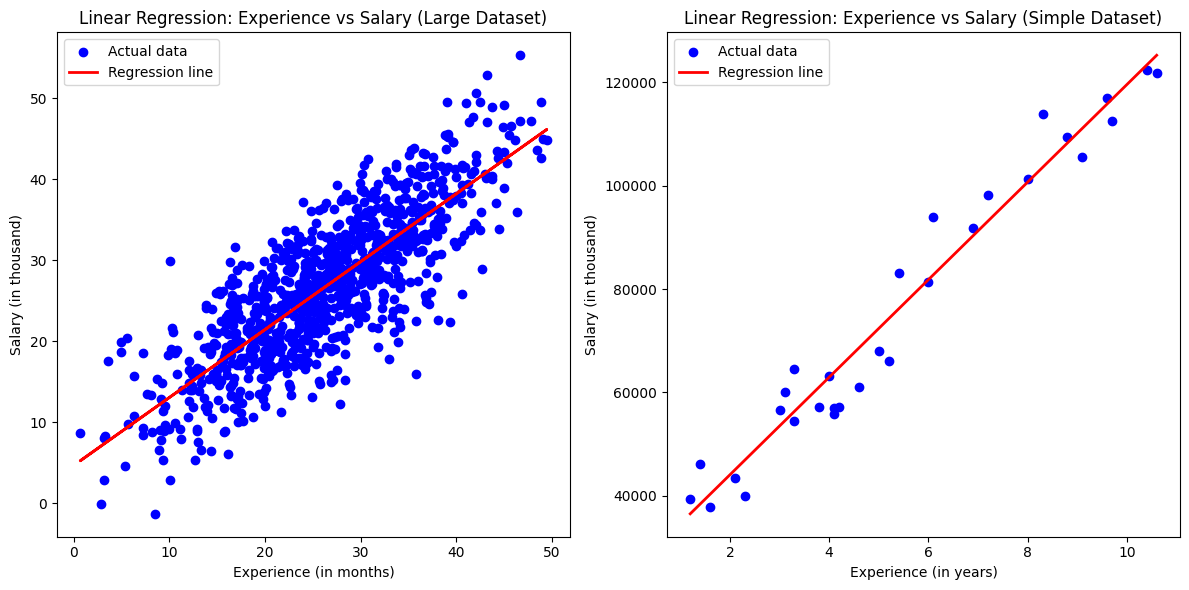

In [221]:
# Vẽ đồ thị cho dataset lớn và dataset đơn giản kế bên nhau
plt.figure(figsize=(12, 6))  # Cài đặt kích thước cửa sổ đồ thị (2 biểu đồ kế bên nhau)

# Đồ thị cho dataset lớn
plt.subplot(1, 2, 1)  # 1 hàng, 2 cột, đồ thị đầu tiên
plt.scatter(X_large, y_large, color='blue', label='Actual data')
plt.plot(X_large, model_large.predict(X_large), color='red', linewidth=2, label='Regression line')
plt.xlabel('Experience (in months)')
plt.ylabel('Salary (in thousand)')
plt.title('Linear Regression: Experience vs Salary (Large Dataset)')
plt.legend()

# Đồ thị cho dataset đơn giản
plt.subplot(1, 2, 2)  # 1 hàng, 2 cột, đồ thị thứ hai
plt.scatter(X_simple, y_simple, color='blue', label='Actual data')
plt.plot(X_simple, model_simple.predict(X_simple), color='red', linewidth=2, label='Regression line')
plt.xlabel('Experience (in years)')
plt.ylabel('Salary (in thousand)')
plt.title('Linear Regression: Experience vs Salary (Simple Dataset)')
plt.legend()

# Hiển thị cả hai đồ thị kế bên nhau
plt.tight_layout()  # Điều chỉnh để đồ thị không bị chồng lên nhau
plt.show()


In [222]:
mse_large = mean_squared_error(y_test_large, y_pred_large)  # Tính toán lỗi bình phương trung bình (MSE) giữa giá trị thực tế (y_test) và giá trị dự đoán (y_pred)
r2_large = r2_score(y_test_large, y_pred_large)  # Tính toán chỉ số R² (Coefficient of Determination) để đánh giá độ khớp của mô hình

# In ra lỗi bình phương trung bình (MSE) và chỉ số R² với 2 chữ số thập phân
print("Mean Squared Error:", round(mse_large, 2))  # In MSE làm tròn đến 2 chữ số thập phân
print("R² Score:", round(r2_large, 2))  # In R² Score làm tròn đến 2 chữ số thập phân


mse_simple = mean_squared_error(y_test_simple, y_pred_simple)  # Tính toán lỗi bình phương trung bình (MSE) giữa giá trị thực tế (y_test) và giá trị dự đoán (y_pred)
r2_simple = r2_score(y_test_simple, y_pred_simple)  # Tính toán chỉ số R² (Coefficient of Determination) để đánh giá độ khớp của mô hình

# In ra lỗi bình phương trung bình (MSE) và chỉ số R² với 2 chữ số thập phân
print("Mean Squared Error:", round(mse_simple, 2))  # In MSE làm tròn đến 2 chữ số thập phân
print("R² Score:", round(r2_simple, 2))  # In R² Score làm tròn đến 2 chữ số thập phân

Mean Squared Error: 22.9
R² Score: 0.63
Mean Squared Error: 27610203.37
R² Score: 0.89
